In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 97ms/step - accuracy: 0.2863 - loss: 1.9022 - val_accuracy: 0.5499 - val_loss: 1.2615
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 101ms/step - accuracy: 0.5355 - loss: 1.3136 - val_accuracy: 0.6135 - val_loss: 1.1018
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.6032 - loss: 1.1363 - val_accuracy: 0.6382 - val_loss: 1.0365
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.6517 - loss: 1.0081 - val_accuracy: 0.6773 - val_loss: 0.9156
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 98ms/step - accuracy: 0.6808 - loss: 0.9191 - val_accuracy: 0.6923 - val_loss: 0.8852
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.6969 - loss: 0.8636 - val_accuracy: 0.6989 - val_loss: 0.8733
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 101ms/step - accuracy: 0.7192 - loss: 0.7975 - val_accuracy: 0.6964 - val_loss: 0.8701
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 96ms/step - accuracy: 0.7395 - loss: 0.7534

In [6]:
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


In [7]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

In [8]:
# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
])
print(report)

              precision    recall  f1-score   support

    airplane       0.67      0.84      0.75      1000
  automobile       0.80      0.87      0.84      1000
        bird       0.66      0.55      0.60      1000
         cat       0.56      0.55      0.55      1000
        deer       0.72      0.64      0.68      1000
         dog       0.69      0.60      0.64      1000
        frog       0.85      0.74      0.79      1000
       horse       0.74      0.79      0.77      1000
        ship       0.74      0.86      0.80      1000
       truck       0.80      0.79      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



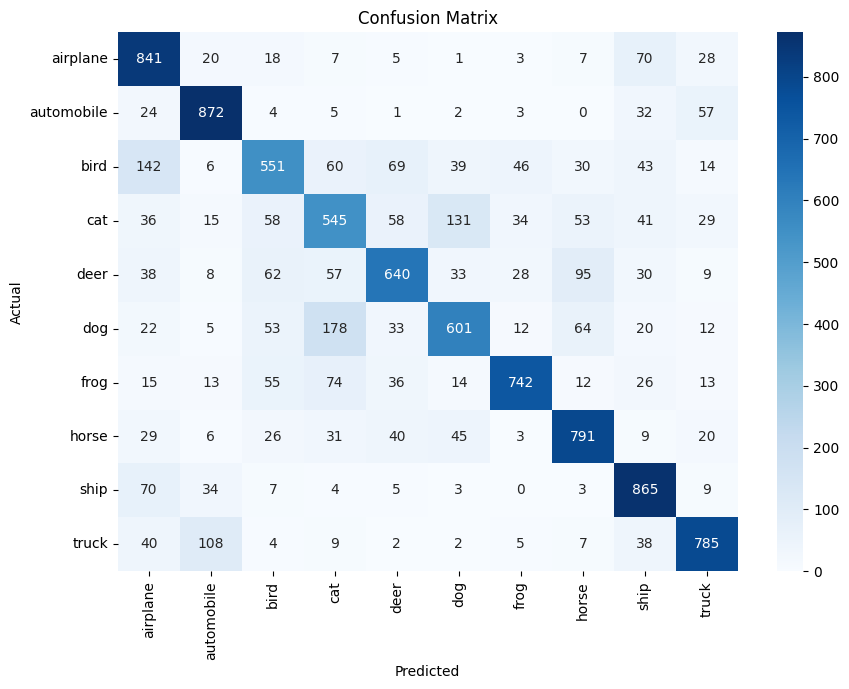

In [9]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
], yticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()